# House Price Index Data Set
## KEY: HPI1
## Source: 

FHFA House Price Indexes (HPIs). (2014, May 27). [​FHFA estimates and publishes quarterly house price indexes for single-family detached properties using data on conventional conforming mortgage transactions obtained from the Federal Home Loan Mortgage Corporation (Freddie Mac) and the Federal National Mortgage Association (Fannie Mae).]. Federal Housing Finance Agency. http://www.fhfa.gov/DataTools/Downloads/Documents/HPI/HPI_master.csv


In [1]:
# import needed libraries
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load the hpi csv into a dataframe
dfHPI = pd.read_csv(r'../DataSet/HPI_master.csv',header=0,encoding = "ISO-8859-1")

In [3]:
# show the first 5 rows to check data loaded as epected
dfHPI.head(5)

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
0,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,1,100.00,100.00
1,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,2,101.00,101.08
2,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,3,101.36,100.98
3,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,4,101.75,101.04
4,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,5,102.39,101.44


In [4]:
# show last 5 rows to check data loaded as epected
dfHPI.tail(5)

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
112989,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2019,2,165.06,165.10
112990,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2019,3,157.94,162.01
112991,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2019,4,159.22,154.24
112992,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2020,1,147.27,150.59
112993,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2020,2,155.36,155.08


In [5]:
# run describe to get basics
dfHPI.describe(include="all")

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
count,112994,112994,112994,112994,112994,112994,112994.000000,112994.000000,112993.000000,37164.000000
unique,4,3,2,4,466,466,NaN,NaN,NaN,NaN
top,traditional,all-transactions,quarterly,MSA,Middle Atlantic Division,DV_WSC,NaN,NaN,NaN,NaN
freq,106580,75830,109444,78948,773,773,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2002.349877,2.614820,162.694086,180.209982
std,NaN,NaN,NaN,NaN,NaN,NaN,10.887382,1.435539,77.745761,66.684389
min,NaN,NaN,NaN,NaN,NaN,NaN,1975.000000,1.000000,18.340000,70.650000
25%,NaN,NaN,NaN,NaN,NaN,NaN,1994.000000,2.000000,106.370000,125.540000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,3.000000,152.040000,173.880000
75%,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,4.000000,198.300000,216.630000


In [6]:
# there are 4 values for hpi_type, what are they and what are their counts
dfHPI.hpi_type.value_counts()

traditional      106580
non-metro          4794
distress-free      1416
developmental       204
Name: hpi_type, dtype: int64

In [7]:
# there are 3 values for hpi_flavor, what are they and what are their counts
dfHPI.hpi_flavor.value_counts()

all-transactions    75830
purchase-only       24066
expanded-data       13098
Name: hpi_flavor, dtype: int64

In [8]:
# there are 2 values for frequency, what are they and what are their counts
dfHPI.frequency.value_counts()

quarterly    109444
monthly        3550
Name: frequency, dtype: int64

In [9]:
# there are 4 values for level, what are they and what are their counts
dfHPI.level.value_counts()

MSA                       78948
State                     26112
USA or Census Division     7730
Puerto Rico                 204
Name: level, dtype: int64

In [10]:
# We want to better understand place_name, but there are 466 unique values, I want to scan them
dfHPI.place_name.value_counts()

Middle Atlantic Division         773
West North Central Division      773
Pacific Division                 773
West South Central Division      773
East North Central Division      773
                                ... 
Johnstown, PA                    101
Beckley, WV                       93
California-Lexington Park, MD     91
Hinesville, GA                    79
The Villages, FL                  79
Name: place_name, Length: 466, dtype: int64

**QUESTION** how many cities are in Virginia in the data set?

In [11]:
dfHPI[dfHPI['place_name'].str.contains(", VA")].groupby(['place_name']).count()

,hpi_type,hpi_flavor,frequency,level,place_id,yr,period,index_nsa,index_sa
place_name,,,,,,,,,
"Blacksburg-Christiansburg, VA",132,132,132,132,132,132,132,132,0
"Charlottesville, VA",148,148,148,148,148,148,148,148,0
"Harrisonburg, VA",134,134,134,134,134,134,134,134,0
"Lynchburg, VA",137,137,137,137,137,137,137,137,0
"Richmond, VA",295,295,295,295,295,295,295,295,118
"Roanoke, VA",161,161,161,161,161,161,161,161,0
"Staunton, VA",125,125,125,125,125,125,125,125,0
"Virginia Beach-Norfolk-Newport News, VA-NC",411,411,411,411,411,411,411,411,236
"Winchester, VA-WV",123,123,123,123,123,123,123,123,0


In [46]:
meanVAHPI = dfHPI[dfHPI['place_name'].str.contains(", VA")].groupby(["yr"])["index_nsa"].mean()

dfMeanVAHPI = pd.DataFrame({'yr':meanVAHPI.index, 'meanHPI':meanVAHPI.values})


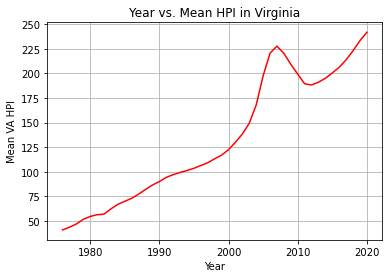

In [47]:

# quick chart of years vs. $100 in 1995 $
plt.plot(dfMeanVAHPI['yr'],dfMeanVAHPI['meanHPI'],color='red')
plt.title('Year vs. Mean HPI in Virginia')
plt.xlabel('Year')
plt.ylabel('Mean VA HPI')
plt.grid(True)
plt.show()

What about **NY state?**

In [13]:
dfHPI[dfHPI['place_name'].str.contains(", NY")].groupby(['place_name']).count()

,hpi_type,hpi_flavor,frequency,level,place_id,yr,period,index_nsa,index_sa
place_name,,,,,,,,,
"Albany-Schenectady-Troy, NY",281,281,281,281,281,281,281,281,118
"Binghamton, NY",147,147,147,147,147,147,147,147,0
"Buffalo-Cheektowaga, NY",290,290,290,290,290,290,290,290,118
"Elmira, NY",119,119,119,119,119,119,119,119,0
"Glens Falls, NY",116,116,116,116,116,116,116,116,0
"Ithaca, NY",133,133,133,133,133,133,133,133,0
"Kingston, NY",136,136,136,136,136,136,136,136,0
"Nassau County-Suffolk County, NY (MSAD)",416,416,416,416,416,416,416,416,236
"New York-Jersey City-White Plains, NY-NJ (MSAD)",415,415,415,415,415,415,415,415,236


What about **CA**?

In [14]:
dfHPI[dfHPI['place_name'].str.contains(", CA")].groupby(['place_name']).count()

,hpi_type,hpi_flavor,frequency,level,place_id,yr,period,index_nsa,index_sa
place_name,,,,,,,,,
"Anaheim-Santa Ana-Irvine, CA (MSAD)",535,535,535,535,535,535,535,535,354
"Bakersfield, CA",290,290,290,290,290,290,290,290,118
"Chico, CA",164,164,164,164,164,164,164,164,0
"El Centro, CA",124,124,124,124,124,124,124,124,0
"Fresno, CA",292,292,292,292,292,292,292,292,118
"Hanford-Corcoran, CA",134,134,134,134,134,134,134,134,0
"Los Angeles-Long Beach-Glendale, CA (MSAD)",536,536,536,536,536,536,536,536,354
"Madera, CA",149,149,149,149,149,149,149,149,0
"Merced, CA",160,160,160,160,160,160,160,160,0


Looks like **MSA** == local jurisdiction

In [15]:
# what are the value counts on period
dfHPI.period.value_counts()

2     28015
1     27885
4     27412
3     27332
7       300
6       300
5       300
12      290
11      290
10      290
9       290
8       290
Name: period, dtype: int64

Looks like period 1,2,3,4 are used for **both quarterly and monthly** frequencies. 

**QUESTION** Need to understand the 10 fewer values for August - December, and reasons that quarterly values are not at the same value counts.

#### Want to investigate the number of observations by year (do we have more date for more recent years)?

In [16]:
pd.set_option('display.max_rows', None)
dfHPI.groupby(['yr','frequency','level']).count()


hpi_type  hpi_flavor  place_name  \
yr   frequency level                                                      
1975 quarterly MSA                           32          32          32   
               State                        204         204         204   
               USA or Census Division        40          40          40   
1976 quarterly MSA                          141         141         141   
               State                        204         204         204   
               USA or Census Division        40          40          40   
1977 quarterly MSA                          281         281         281   
               State                        204         204         204   
               USA or Census Division        40          40          40   
1978 quarterly MSA                          445         445         445   
               State                        204         204         204   
               USA or Census Division        40          40          40   
1979 quarterly MSA                          570         570         570   
               State                        204         204         204   
               USA or Census Division        40          40          40   
1980 quarterly MSA                          653         653         653   
               State                        204         204         204   
               USA or Census Division        40          40          40   
1981 quarterly MSA                          645         645         645   
               State                        204         204         204   
               USA or Census Division        40          40          40   
1982 quarterly MSA                          655         655         655   
               State                        204         204         204   
               USA or Census Division        40          40          40   
1983 quarterly MSA                          763         763         763   
               State                        204         204         204   
               USA or Census Division        40          40          40   
1984 quarterly MSA                          846         846         846   
               State                        204         204         204   
               USA or Census Division        40          40          40   
1985 quarterly MSA                          942         942         942   
               State                        204         204         204   
               USA or Census Division        40          40          40   
1986 quarterly MSA                         1125        1125        1125   
               State                        204         204         204   
               USA or Census Division        40          40          40   
1987 quarterly MSA                         1297        1297        1297   
               State                        204         204         204   
               USA or Census Division        40          40          40   
1988 quarterly MSA                         1350        1350        1350   
               State                        204         204         204   
               USA or Census Division        40          40          40   
1989 quarterly MSA                         1389        1389        1389   
               State                        204         204         204   
               USA or Census Division        40          40          40   
1990 quarterly MSA                         1432        1432        1432   
               State                        204         204         204   
               USA or Census Division        40          40          40   
1991 monthly   USA or Census Division       120         120         120   
     quarterly MSA                         2106        2106        2106   
               State                        612         612         612   
               USA or Census Division       120         120     

In [17]:
#dfHPI[level='MSA'].groupby(['yr','frequency']).count()

dfHPI[(dfHPI.level == 'MSA')].groupby(['yr','frequency']).count()

,,hpi_type,hpi_flavor,level,place_name,place_id,period,index_nsa,index_sa
yr,frequency,,,,,,,,
1975,quarterly,32,32,32,32,32,32,32,0
1976,quarterly,141,141,141,141,141,141,141,0
1977,quarterly,281,281,281,281,281,281,281,0
1978,quarterly,445,445,445,445,445,445,445,0
1979,quarterly,570,570,570,570,570,570,570,0
1980,quarterly,653,653,653,653,653,653,653,0
1981,quarterly,645,645,645,645,645,645,645,0
1982,quarterly,655,655,655,655,655,655,655,0
1983,quarterly,763,763,763,763,763,763,763,0


### Basic Dataframe Information
1. There is "missing data" for some groupings
    1. Quarterly Data for 1975 - 2020
    1. Monthly data does not start until 1991
    1. Monthly data is **only** for national data
    1. Quarterly is for State, locality, and national
    1. Number of cities/local jurisidctions reporting quarterly changes year to year: min reportin localities == 1975, max == 2001 - 2019
1. Nine Virginia cities are represented, including Charlottesville, Virginia Beach, and Richmond
